In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib as mpl
import seaborn as sns

In [3]:

df = pd.read_csv('Ecommerce_marketing_campaign.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df['Age'] = 2022-df.Year_Birth

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,41


#### regression plot to show the relationship between “Age” and “Income”, for customers with different “Education”

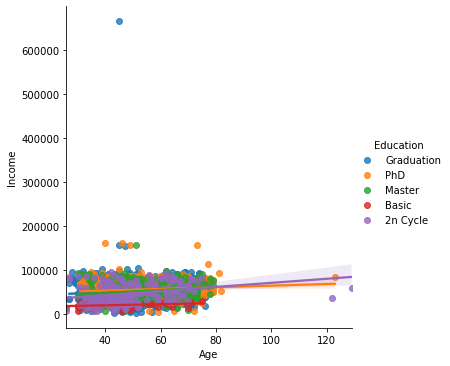

In [7]:
sns.lmplot(x='Age',y='Income',data = df,hue = 'Education')

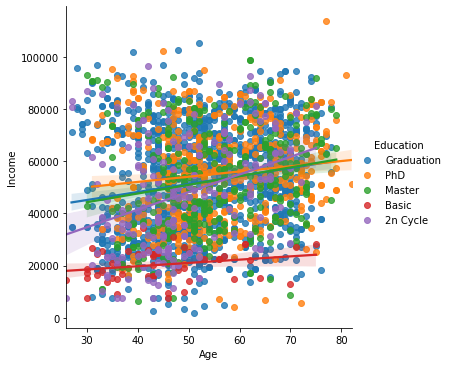

In [8]:
from detect_outliers import detect_outliers
df0 = df.drop(detect_outliers(df,['Age']).index)
df0 = df0.drop(detect_outliers(df,['Income']).index)
sns.lmplot(x='Age',y='Income',data = df0,hue = 'Education')

In [12]:
df0.Age.describe()

count    2229.000000
mean       53.111261
std        11.707430
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [15]:
df0.groupby(['Age_tag','Education'])['Income'].mean()

Age_tag  Education 
20-30    2n Cycle      64593.500000
         Basic         14635.200000
         Graduation    65198.000000
         Master        67764.500000
         PhD                    NaN
31-40    2n Cycle      39176.289474
         Basic         19429.200000
         Graduation    45467.303571
         Master        45843.536585
         PhD           56414.039216
41-50    2n Cycle      41534.700000
         Basic         21076.000000
         Graduation    49550.862805
         Master        49641.868132
         PhD           51359.991870
51-60    2n Cycle      53663.176471
         Basic         21221.000000
         Graduation    52530.023810
         Master        51092.692308
         PhD           53702.156028
>60      2n Cycle      60367.119048
         Basic         23163.857143
         Graduation    56911.169935
         Master        58023.833333
         PhD           59121.726708
Name: Income, dtype: float64

#### 3.Create a histogram that shows for people with different “Marital_Status” and break down by “Education”, what is their response rate to marketing campaigns (“Response”)

In [20]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Widow','Alone','Absurd','YOLO'] else x)

In [22]:
df0 = df[['Response','Marital_Status','Education']].groupby(['Marital_Status','Education']).sum()
df0['total'] = df.groupby(['Marital_Status','Education'])['Response'].count().values
df0['Response_rate'] = round(df0.Response/df0.total,2)
df0=df0.reset_index()

In [23]:
df0

,Marital_Status,Education,Response,total,Response_rate
0,Divorced,2n Cycle,5,23,0.22
1,Divorced,Basic,0,1,0.00
2,Divorced,Graduation,19,119,0.16
3,Divorced,Master,6,37,0.16
4,Divorced,PhD,18,52,0.35
5,Married,2n Cycle,8,81,0.10
6,Married,Basic,0,20,0.00
7,Married,Graduation,43,433,0.10
8,Married,Master,15,138,0.11
9,Married,PhD,32,192,0.17


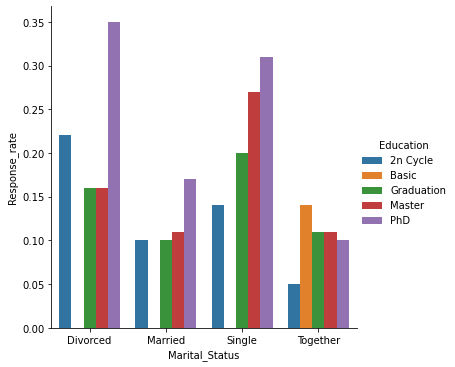

In [24]:
sns.catplot(x='Marital_Status',y='Response_rate',hue='Education',data = df0,kind='bar')

#### 4.Create a density plot to show the distribution “Income” for customers with different “Education” level

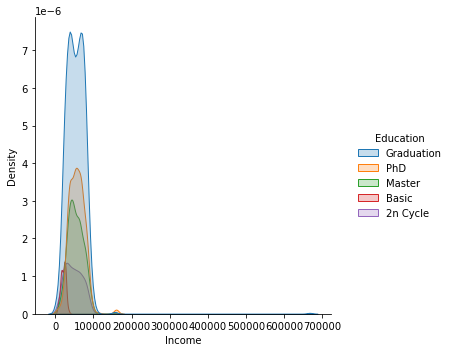

In [25]:
sns.displot(df, x="Income", kind="kde",hue ='Education',fill = True)

In [26]:
%%writefile detect_outliers.py

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = df[c].quantile(.25)
        # 3rd quartile
        Q3 = df[c].quantile(.75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    return df.iloc[outlier_indices]

Overwriting detect_outliers.py


In [27]:
outlier_list = detect_outliers(df,['Income'])
#df.iloc[outlier_list]
outlier_list

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,1973,PhD,Married,157243.0,0,1,3/1/2014,98,20,...,0,0,0,0,0,0,3,11,0,49
617,1503,1976,PhD,Together,162397.0,1,1,6/3/2013,31,85,...,0,0,0,0,0,0,3,11,0,46
655,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/2014,81,1,...,0,0,0,0,0,0,3,11,0,47
687,1501,1982,PhD,Married,160803.0,0,0,8/4/2012,21,55,...,0,0,0,0,0,0,3,11,0,40
1300,5336,1971,Master,Together,157733.0,1,0,6/4/2013,37,39,...,0,0,0,0,0,0,3,11,0,51
1653,4931,1977,Graduation,Together,157146.0,0,0,4/29/2013,13,1,...,0,0,0,0,0,0,3,11,0,45
2132,11181,1949,PhD,Married,156924.0,0,0,8/29/2013,85,2,...,0,0,0,0,0,0,3,11,0,73
2233,9432,1977,Graduation,Together,666666.0,1,0,6/2/2013,23,9,...,0,0,0,0,0,0,3,11,0,45


In [28]:
df2 = df.drop(index = 2233)

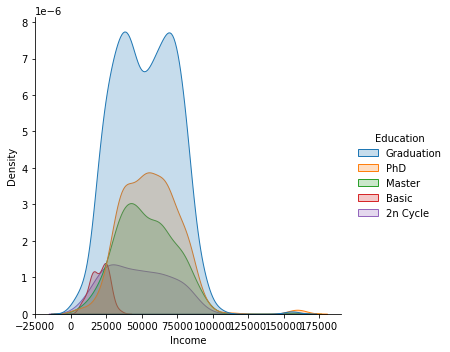

In [29]:
sns.displot(df2, x="Income", kind="kde",hue ='Education',fill = True)

#### 5.Open exploration:Our goal is find out what kind of customers are more likely to response to our promotion (what kind of customer might have “Reponse”==1)?

In [30]:
df_analysis = df.groupby('Response').mean().transpose()

In [31]:
df_analysis = df_analysis.rename({0:'No',1:'Yes'},axis = 1)

In [32]:
df_analysis

Response,No,Yes
ID,5622.009444,5421.820359
Year_Birth,1968.698846,1969.416168
Income,50839.132767,60209.675676
Kidhome,0.462225,0.341317
Teenhome,0.541448,0.305389
Recency,51.514690,35.383234
MntA,269.104407,502.703593
MntB,24.216684,38.203593
MntC,144.624344,294.353293
MntD,34.980063,52.050898


In [33]:
df_analysis['diff%_abs'] = abs((df_analysis['No']-df_analysis['Yes'])/df_analysis['Yes'])

In [34]:
df_analysis['diff%'] = (df_analysis['No']-df_analysis['Yes'])/df_analysis['Yes']

In [35]:
df_analysis.sort_values('diff%_abs',ascending = False)

Response,No,Yes,diff%_abs,diff%
AcceptedCmp2,0.005247,0.059880,0.912382,-0.912382
AcceptedCmp5,0.037251,0.275449,0.864763,-0.864763
AcceptedCmp1,0.034103,0.236527,0.855818,-0.855818
AcceptedCmp3,0.045121,0.230539,0.804282,-0.804282
Teenhome,0.541448,0.305389,0.772977,0.772977
AcceptedCmp4,0.055089,0.185629,0.703229,-0.703229
MntC,144.624344,294.353293,0.508671,-0.508671
MntA,269.104407,502.703593,0.464686,-0.464686
Recency,51.514690,35.383234,0.455907,0.455907
NumCatalogPurchases,2.391920,4.203593,0.430982,-0.430982


### Campaign response_rate VS Final response 

In [36]:
group = df.groupby('Response')[['AcceptedCmp2','AcceptedCmp5','AcceptedCmp1','AcceptedCmp3','AcceptedCmp4']].mean().transpose()

In [37]:
group

Response,0,1
AcceptedCmp2,0.005247,0.059880
AcceptedCmp5,0.037251,0.275449
AcceptedCmp1,0.034103,0.236527
AcceptedCmp3,0.045121,0.230539
AcceptedCmp4,0.055089,0.185629


In [38]:
result = pd.concat([group,group])

In [39]:
result = result.reset_index()

In [40]:
result['rate'] =  pd.concat([group[0],group[1]]).values

In [41]:
result = result.rename({'index':'Campaign_type',0:'No_response',1:'Yes_response'},axis = 1)

In [42]:
result['Compare'] = (result.Yes_response ==result.rate).values

In [43]:
result

Response,Campaign_type,No_response,Yes_response,rate,Compare
0,AcceptedCmp2,0.005247,0.059880,0.005247,False
1,AcceptedCmp5,0.037251,0.275449,0.037251,False
2,AcceptedCmp1,0.034103,0.236527,0.034103,False
3,AcceptedCmp3,0.045121,0.230539,0.045121,False
4,AcceptedCmp4,0.055089,0.185629,0.055089,False
5,AcceptedCmp2,0.005247,0.059880,0.059880,True
6,AcceptedCmp5,0.037251,0.275449,0.275449,True
7,AcceptedCmp1,0.034103,0.236527,0.236527,True
8,AcceptedCmp3,0.045121,0.230539,0.230539,True
9,AcceptedCmp4,0.055089,0.185629,0.185629,True


In [44]:
result['response_type'] = result.Compare.apply(lambda x:'Yes_res'if x else 'No_res')

In [45]:
result

Response,Campaign_type,No_response,Yes_response,rate,Compare,response_type
0,AcceptedCmp2,0.005247,0.059880,0.005247,False,No_res
1,AcceptedCmp5,0.037251,0.275449,0.037251,False,No_res
2,AcceptedCmp1,0.034103,0.236527,0.034103,False,No_res
3,AcceptedCmp3,0.045121,0.230539,0.045121,False,No_res
4,AcceptedCmp4,0.055089,0.185629,0.055089,False,No_res
5,AcceptedCmp2,0.005247,0.059880,0.059880,True,Yes_res
6,AcceptedCmp5,0.037251,0.275449,0.275449,True,Yes_res
7,AcceptedCmp1,0.034103,0.236527,0.236527,True,Yes_res
8,AcceptedCmp3,0.045121,0.230539,0.230539,True,Yes_res
9,AcceptedCmp4,0.055089,0.185629,0.185629,True,Yes_res


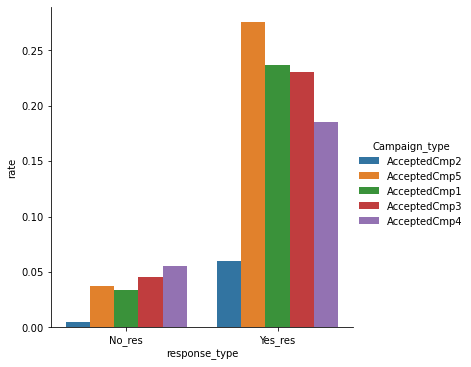

In [46]:
g = sns.catplot(
    data=result, kind="bar",
    x="response_type", y="rate", hue="Campaign_type",
)

### Teenhome VS Response 

In [47]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [48]:
df.groupby('Response')['Teenhome'].value_counts()

Response  Teenhome
0         1           938
          0           921
          2            47
1         0           237
          1            92
          2             5
Name: Teenhome, dtype: int64

In [49]:
teen = df.groupby('Teenhome').Response.value_counts(normalize = True).to_frame()

In [50]:
teen

Response
Teenhome Response          
0        0         0.795337
         1         0.204663
1        0         0.910680
         1         0.089320
2        0         0.903846
         1         0.096154

In [51]:
teen = teen.rename({'Response':'Response_rate'},axis = 1)

In [52]:
teen = teen.reset_index()

In [53]:
teen

,Teenhome,Response,Response_rate
0,0,0,0.795337
1,0,1,0.204663
2,1,0,0.910680
3,1,1,0.089320
4,2,0,0.903846
5,2,1,0.096154


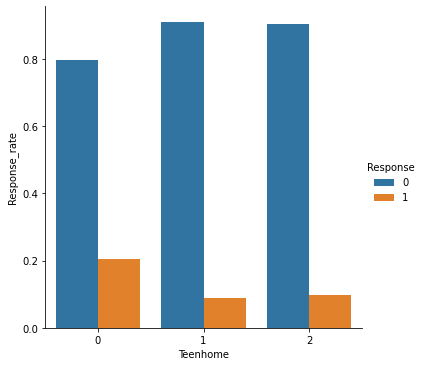

In [54]:
sns.catplot(x = 'Teenhome', y = 'Response_rate',hue = 'Response',data = teen,kind = 'bar')

business insight: customer with no teenhome's response slightly higher than the rest

### Mnt A-F VS Response rate

In [55]:
df[['MntC','MntA','MntB','MntD','MntE','MntF']].describe()

,MntC,MntA,MntB,MntD,MntE,MntF
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,166.950000,303.935714,26.302232,37.525446,27.062946,44.021875
std,225.715373,336.597393,39.773434,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,23.750000,1.000000,3.000000,1.000000,9.000000
50%,67.000000,173.500000,8.000000,12.000000,8.000000,24.000000
75%,232.000000,504.250000,33.000000,50.000000,33.000000,56.000000
max,1725.000000,1493.000000,199.000000,259.000000,263.000000,362.000000


In [56]:
mnt_df = df[['ID','MntC','MntA','MntB','MntD','MntE','MntF','Response']]

In [57]:
mnt_df

,ID,MntC,MntA,MntB,MntD,MntE,MntF,Response
0,5524,546,635,88,172,88,88,1
1,2174,6,11,1,2,1,6,0
2,4141,127,426,49,111,21,42,0
3,6182,20,11,4,10,3,5,0
4,5324,118,173,43,46,27,15,0
...,...,...,...,...,...,...,...,...
2235,10870,182,709,43,42,118,247,0
2236,4001,30,406,0,0,0,8,0
2237,7270,217,908,48,32,12,24,0
2238,8235,214,428,30,80,30,61,0


In [58]:
mnt_df['Mnt_total'] = mnt_df['MntC']+mnt_df['MntA']+mnt_df['MntB']+mnt_df['MntD']+mnt_df['MntE']+mnt_df['MntF']
mnt_df['Mnt_mean'] =  round(mnt_df['Mnt_total']/6,3)

<ipython-input-58-f9fe247d0a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnt_df['Mnt_total'] = mnt_df['MntC']+mnt_df['MntA']+mnt_df['MntB']+mnt_df['MntD']+mnt_df['MntE']+mnt_df['MntF']
<ipython-input-58-f9fe247d0a56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnt_df['Mnt_mean'] =  round(mnt_df['Mnt_total']/6,3)


In [59]:
mnt_df.Mnt_mean.describe()

count    2240.000000
mean      100.966365
std       100.374881
min         0.833000
25%        11.458250
50%        66.000000
75%       174.250250
max       420.833000
Name: Mnt_mean, dtype: float64

### Qns to explore, is it the more they spent, the higher reponse rate we will get?

In [60]:
bins = [0,50,100,150,200,250,300,450]
Mnt_group = ['0-50','51-100','101-150','151-200','201-250','251-300','>300']

In [61]:
mnt_df['Mnt_tag'] = pd.cut(mnt_df['Mnt_mean'],bins,labels = Mnt_group)

<ipython-input-61-2442c4e96e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnt_df['Mnt_tag'] = pd.cut(mnt_df['Mnt_mean'],bins,labels = Mnt_group)


In [62]:
mnt = mnt_df.groupby('Mnt_tag').agg({'Response':'mean','Mnt_mean':'count'})

In [63]:
mnt = mnt.rename({'Response':'Response_rate','Mnt_mean':'Nos_of_response'},axis = 1).reset_index()

In [64]:
mnt

,Mnt_tag,Response_rate,Nos_of_response
0,0-50,0.088608,1027
1,51-100,0.134021,291
2,101-150,0.120000,225
3,151-200,0.125000,280
4,201-250,0.228070,171
5,251-300,0.335664,143
6,>300,0.533981,103


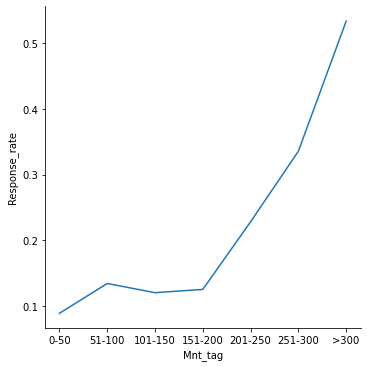

In [65]:
sns.relplot(x='Mnt_tag',y='Response_rate',kind = 'line',data = mnt)